### **Problem Statment**
#### Predict delivery time using sorting time.

### **Business Statment**
#### Develop a simple linear regression model for predicting delivery time using sorting tme.

In [2]:
#Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

### **Data acquisition**
Import data

In [3]:
df = pd.read_csv('delivery_time.csv')
print(df.head())
print(df.columns)

   Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10
Index(['Delivery Time', 'Sorting Time'], dtype='object')


### **Exploratory Data Analysis** 


In [4]:
print('Info of Data :',df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes
Info of Data : None


1. Data has only float and integer values.
2. No variable column has null/missing values.

In [5]:
df.duplicated().sum()

0

No duplicate values in data.

#### Summary statistics

In [6]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


#### Data Visualization

Correlation : 
                Delivery Time  Sorting Time
Delivery Time       1.000000      0.825997
Sorting Time        0.825997      1.000000


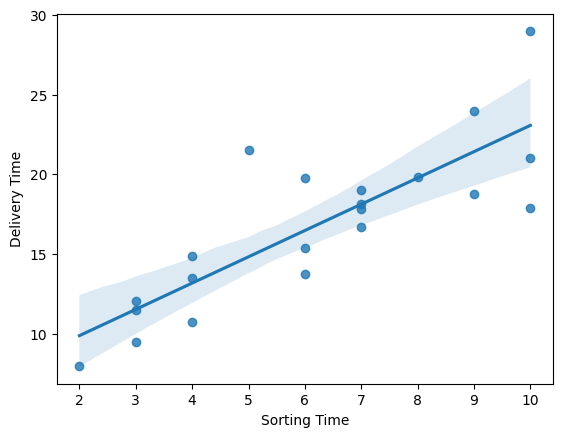

In [7]:
print('Correlation :','\n',df.corr())
Correlation_matrix = sns.regplot(x=df['Sorting Time'],y=df['Delivery Time'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

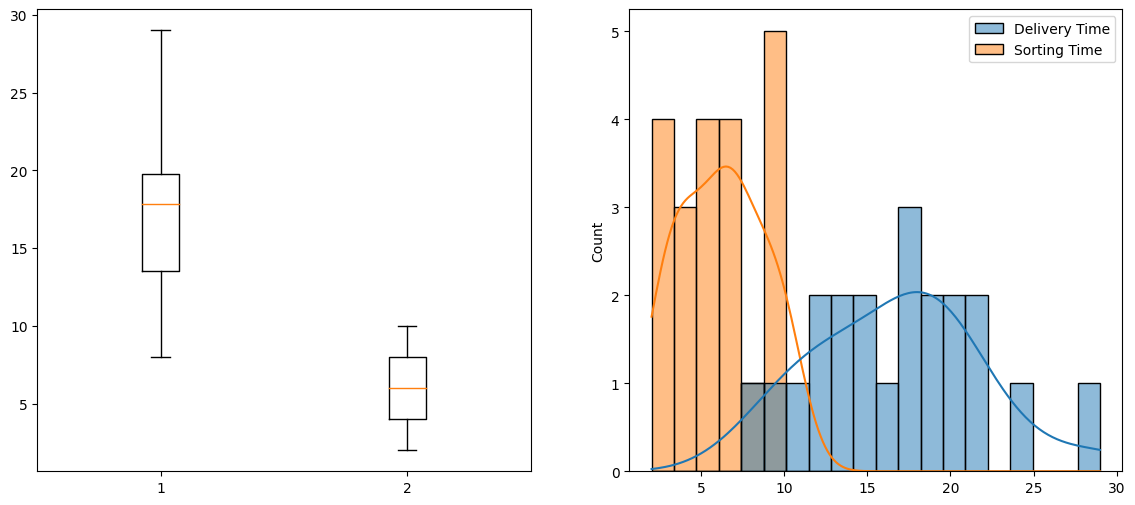

In [8]:

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.boxplot(df)
plt.show
plt.subplot(1,2,2) 
sns.histplot(df,kde=True,bins=20,)
plt.show

From the graphs we get:
1. No outlier or extreme values.
2. Sorting Time  : Left skewed distribution
3. Delivery Time : Right skewed distribution

# Data Cleaning
Since no null values, duplicated values and no outliers are present, we can skip Data cleaning.

# Data Transformation
Scince the x-varible 'Sorting Time' is left skewed distribution, we use common transformations include square root, cube root, and log.

In [9]:
x = df[['Sorting Time']]; y= df[['Delivery Time']]

#Square root transormation
sq_trans_x = np.sqrt(x)
#Cube root transformation
cb_trans_x = np.cbrt(x)
# Log transformation
log_trans_x = np.log(x)

# Difference in skewness between the orginal data and transformed data
x_skew = x.skew()
print('Skewness of x-varible                               : ',x_skew)
print('Skewness of x-varible for Square root transormation : ',sq_trans_x.skew())
print('Skewness of x-varible for Cube root transormation   : ',cb_trans_x.skew())
print('Skewness of x-varible for Log transormation         : ',log_trans_x.skew())

Skewness of x-varible                               :  Sorting Time    0.047115
dtype: float64
Skewness of x-varible for Square root transormation :  Sorting Time   -0.259816
dtype: float64
Skewness of x-varible for Cube root transormation   :  Sorting Time   -0.370341
dtype: float64
Skewness of x-varible for Log transormation         :  Sorting Time   -0.605236
dtype: float64


1. From above data we can see data have positve skewness.
2. The data is nearly following normal distribution as skewnss is less than 0.05.
3. The tansfromed datas skewness are grater than orginal data skewness.
So, we don't have to da transformation to the data.

# Data Partition

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = (20))

# Model Selction
We use simple linear regression as there is only one independent varible. i.e., Delivery Time

In [11]:
LR = LinearRegression()
Root_Mean_squared_error_test = []
Root_Mean_squared_error_train = []
R2_score_Test = []
R2_score_Train = []
Coefficient =[]
Intercept =[]
i = 20

In [12]:
def Sim_lin_reg (x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = (i))
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    y_pred_train = LR.predict(x_train)
    y_pred_test = LR.predict(x_test)
    Coefficient.append(LR.coef_[0][0].round(3))
    Intercept.append(LR.intercept_[0].round(3))
    RMSE_train = np.sqrt(mean_squared_error(y_train,y_pred_train).round(2))
    Root_Mean_squared_error_train.append(RMSE_train.round(3))
    RMSE_test = np.sqrt(mean_squared_error(y_test,y_pred_test).round(3))
    Root_Mean_squared_error_test.append(RMSE_test.round(3))
    R2_score_Train.append(r2_score(y_train,y_pred_train).round(3))
    R2_score_Test.append(r2_score(y_test,y_pred_test).round(3))

In [13]:
Tranformations = ['NO_transformation','log(x)','square_root(x)','cubic_root(x)','log(x)&log(y)']
Root_Mean_squared_error_test.clear();Root_Mean_squared_error_train.clear()
R2_score_Test.clear();R2_score_Train.clear();Coefficient.clear();Intercept.clear()

# Simple Linear regression without transformation
x1=x;y1=y
Sim_lin_reg(x1,y1)

#Simple Linear regression with log(x)
x2=np.log(x);y2 =y
Sim_lin_reg(x2,y2)

#Simple Linear regression with square root(x)
x3=np.sqrt(x);y3 =y
Sim_lin_reg(x3,y3)

#Simple Linear regression with cubic root(x)
x4=np.sqrt(x);y4 =y
Sim_lin_reg(x4,y4)

#Simple Linear regression with log(x) and log (y)
x4=np.log(x);y4 =np.log(y)
Sim_lin_reg(x4,y4)

# Evaluating all models and Selecting Best Model


In [14]:
dict = {'Coefficient':Coefficient,
        'Intercept':Intercept,
        'Root_Mean_squared_error_test':Root_Mean_squared_error_test,
        'Root_Mean_squared_error_train':Root_Mean_squared_error_train,
        'R2_score_Test':R2_score_Test,
        'R2_score_Train':R2_score_Train}
df1 = pd.DataFrame(dict,index=Tranformations)
df1

,Coefficient,Intercept,Root_Mean_squared_error_test,Root_Mean_squared_error_train,R2_score_Test,R2_score_Train
NO_transformation,1.322,8.561,3.742,2.592,0.716,0.598
log(x),7.976,2.861,3.811,2.366,0.706,0.665
square_root(x),6.623,0.589,3.719,2.468,0.720,0.635
cubic_root(x),6.623,0.589,3.719,2.468,0.720,0.635
log(x)&log(y),0.528,1.865,0.167,0.141,0.839,0.695


Inference:
we can interpret that for logarithm of both independent and dependent varibles.

we have:
1. Least root mean square error for both test and train data.
2. Max R2 for test and train data

From the inference we can say logarithm of both independent and dependent varibles is best of all models

The required equation is 

log('Delivery Time') = [0.528 X log('Sorting Time')] + 1.865

# Cross validation
We use resampling method

In [15]:
Training_error = []
Test_error = []
R2_Train =[]
R2_Test = []
coefficient =[]
intercept =[]
x4=np.log(x);y4 =np.log(y)
for i in range(1,250):
    x_train,x_test,y_train,y_test = train_test_split(x4,y4,test_size=0.2,random_state = (i))
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    y_pred_train = LR.predict(x_train)
    y_pred_test = LR.predict(x_test)
    Training_error.append(np.sqrt(mean_squared_error(y_train,y_pred_train)).round(2))
    Test_error.append(np.sqrt(mean_squared_error(y_test,y_pred_test)).round(2))
    R2_Train.append(r2_score(y_train,y_pred_train).round(3))
    R2_Test.append(r2_score(y_test,y_pred_test).round(3))
    coefficient.append(LR.coef_.round(3))
    intercept.append(LR.intercept_.round(3))
    
print("validationset approach for Intercept    : ",np.mean(intercept).round(3))
print("validationset approach for Coefficent    : ",np.mean(coefficient).round(3))
print("validationset approach for Traning error : ",np.mean(Training_error).round(2))    
print("validationset approach for Test error    : ",np.mean(Test_error).round(2))
print("validationset approach for R2 Train      : ",np.mean(R2_Train).round(2)*100,'%')
print("validationset approach for R2 Test       : ",np.mean(R2_Test).round(2)*100,'%')


validationset approach for Intercept    :  1.748
validationset approach for Coefficent    :  0.594
validationset approach for Traning error :  0.14
validationset approach for Test error    :  0.16
validationset approach for R2 Train      :  77.0 %
validationset approach for R2 Test       :  46.0 %


<function matplotlib.pyplot.show(close=None, block=None)>

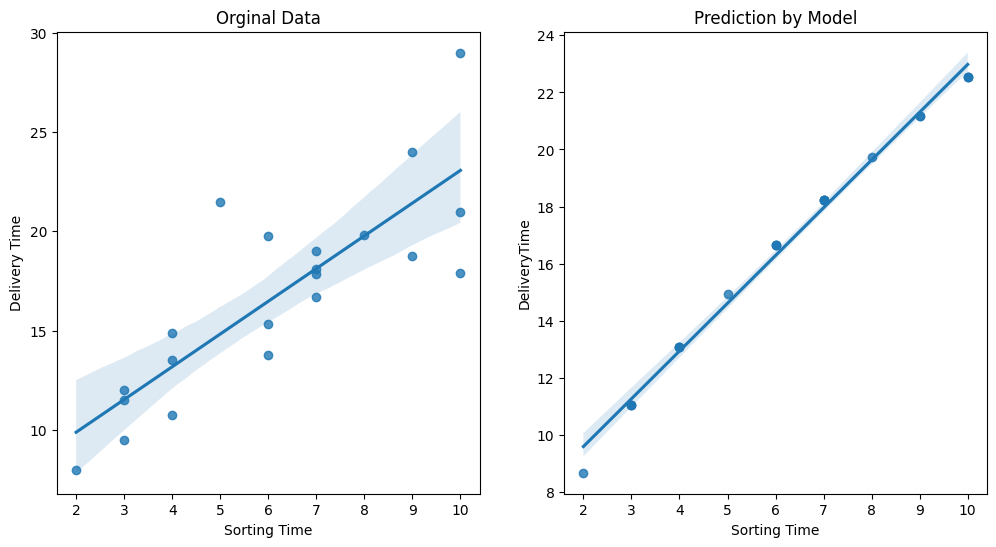

In [16]:
x5=(x)
y5= np.exp(0.594*np.log(x5)+1.748)
y5.rename(columns={'Sorting Time':'DeliveryTime'},inplace=True)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.gca().set_title('Orginal Data')
sns.regplot(x=df['Sorting Time'],y=df['Delivery Time'])

3
plt.subplot(1,2,2)
plt.gca().set_title('Prediction by Model')
sns.regplot(x=x5,y=y5)
plt.show

# Conclusion
From the cross validation we get required equation of simple linear regression

##### log['Delivery Time'] =  0594*log['Sorting Time'] + 1.748